<a href="https://colab.research.google.com/github/Shashank19git/phyLattice/blob/main/Example_Uses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install phyLattice package from github repo.

In [ ]:
! git clone https://github.com/Shashank19git/phyLattice/

Cloning into 'phyLattice'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 109 (delta 48), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 231.45 KiB | 1.94 MiB/s, done.
Resolving deltas: 100% (48/48), done.


# XY-Model

In [ ]:
from phyLattice.xy_package import xy
from numpy import linspace
import matplotlib.pyplot as plt
from torch import randn, float64, sum, exp, mean
import numpy as np

Energy Vs Monte Carlo Steps

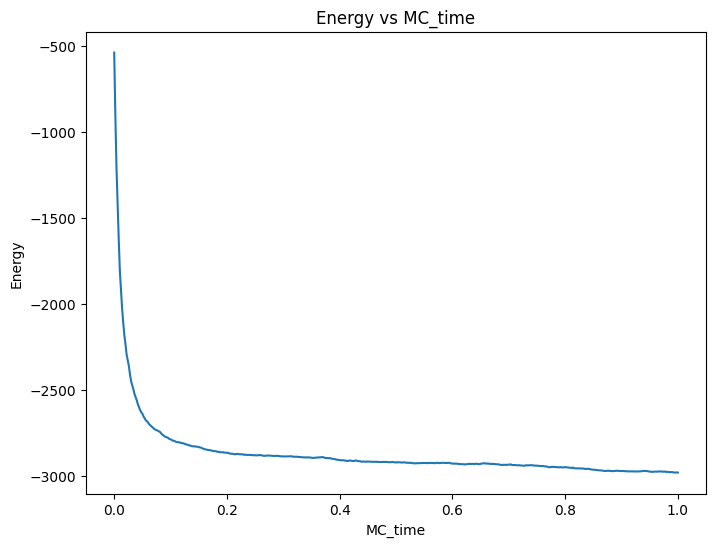

tensor(-2981.8604)

In [ ]:
xy.energy(L = 32, T = 0.1, J = 1.5, n_steps = 500,plot = True ,MC_step_size=1)

Plotting Energy Vs Temperature

In [ ]:
T = linspace(0.1, 4, 40) # range of temperatures

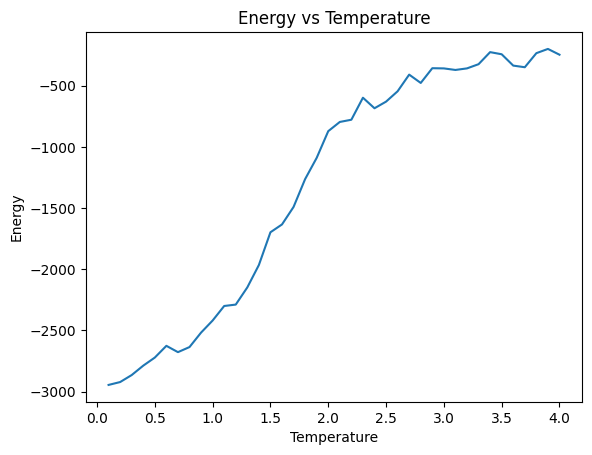

In [ ]:
energies = []
for t in T:
  energies.append(xy.energy(32, t, 1.5, 500,MC_step_size=1))



plt.plot(T, energies)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')
plt.show()

Moving average of the above curve

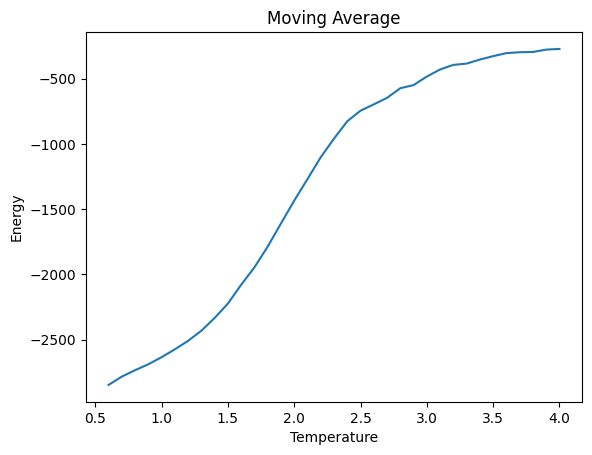

In [ ]:
n=5
MM = []
for i in range(len(energies)):
  if i>n-1:
    MM.append(np.sum(energies[i-n:i])/n)

plt.plot(T[n:], MM)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Moving Average')
plt.show()

Plotting Specific Heat Vs Temperature

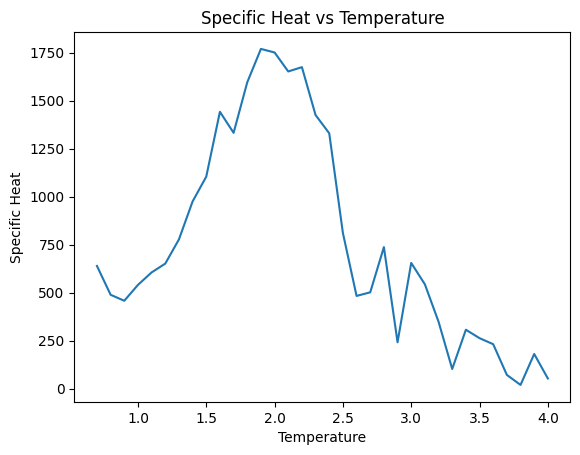

In [ ]:
Cv = []
E_old = 0
for i in range(len(MM)-1):
  Cv.append((MM[i+1]-MM[i])/(T[i+1]-T[i]))


plt.plot(T[n+1:], Cv)
plt.xlabel('Temperature')
plt.ylabel('Specific Heat')
plt.title('Specific Heat vs Temperature')
plt.show()

# QED

In [ ]:
from phyLattice.QED_package import HMC_update, action

In [ ]:
L = 16
Lt = 16
dimension = 3

In [ ]:
# initialise fields
HMC_update.init_fields(L, Lt, dimension)
chi = HMC_update.chi
chi_bar = HMC_update.chi_bar
U = HMC_update.U

In [ ]:
# HMC updates
updates = 600
S = []
for i in range(updates):
  HMC_update.hmc_update(chi, chi_bar, U, L, Lt, 2*10**(-14), 0.5, 0.2, 0.05/(i+1)**2, 0.1, dimension)
  S.append(action.QED_action(chi, chi_bar, U, 0.5, 0.2, 10**(-15), L, Lt, dimension))

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Plotting action vs updates (thermalisation)

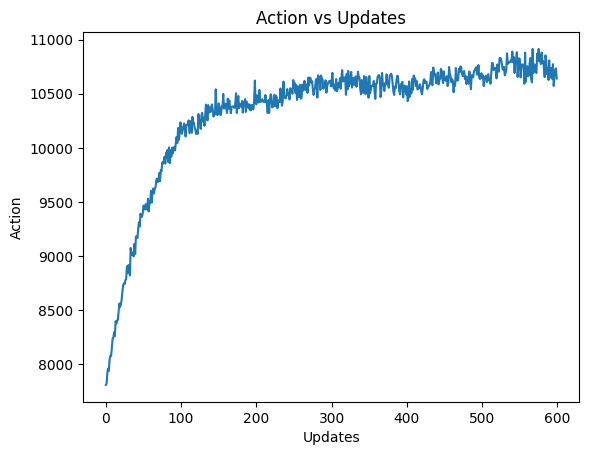

In [ ]:
plt.plot(range(updates), S)
plt.xlabel('Updates')
plt.ylabel('Action')
plt.title('Action vs Updates')
plt.show()

In [ ]:
# define weight (action cutoff chosen to. make weight non-zero and finite)
def weight (chi, chi_bar, U, m, a, L, Lt):
    return exp(7700- action.QED_action(chi, chi_bar, U, 0.5, 0.2, a, L, Lt, dimension))

In [ ]:
action.QED_action(chi, chi_bar, U, 0.5, 0.2, a, L, Lt, dimension)

tensor(7064.8959, dtype=torch.float64)

In [ ]:
weight (chi, chi_bar, U, 0.2, 10**(-14), L, Lt)

tensor(1.2291e+276, dtype=torch.float64)

In [ ]:
# initialise fields
dimension = 3
L = 16
Lt = 16
a = 10**(-14)
HMC_update.init_fields(L, Lt, dimension)
chi = HMC_update.chi
chi_bar = HMC_update.chi_bar
U = HMC_update.U

Variation of two point fermion correlator with lattice constant (a)

In [ ]:

aa = [1*10**(-14), 1.5*10**(-14), 2*10**(-14), 3*10**(-14), 4*10**(-14), 6*10**(-14), 8*10**(-14), 10*10**(-14), 11*10**(-14)]
weight_c = []
w = 0
n_up = 1000
for a in (aa):
  print('a =',a*10**14)
  chichibar = 0
  for i in range(n_up):
    HMC_update.hmc_update(chi, chi_bar, U, L, Lt, a, 0.5, 0.2, 0.05/(i+1)**2, 0.1, dimension)
    chi = chi/abs(chi)
    chi_bar = chi_bar/abs(chi_bar)
    if i>400:
          chichibar += (np.abs(mean(chi[:,:,Lt-1] * chi_bar[:,:,0])).real) * (weight(chi, chi_bar, U, 0.2, a, L, Lt))
          w += (weight(chi, chi_bar, U, 0.256, 1, L, Lt))
  weight_c.append(chichibar/(w+1))


a = 1.0
a = 1.5
a = 2.0
a = 3.0
a = 4.0
a = 6.0
a = 8.0
a = 10.0
a = 11.0


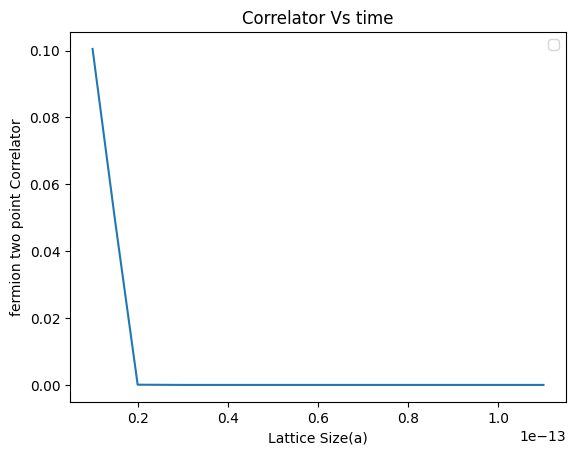

In [ ]:
plt.plot(aa, (weight_c))
plt.legend()
plt.xlabel('Lattice Size(a)')
plt.ylabel('fermion two point Correlator')
plt.title('Correlator Vs time')
plt.show()

Exponintial fitting of Two point Correlation

Slope: -283100389385849.75, Intercept: -2.763778516624924


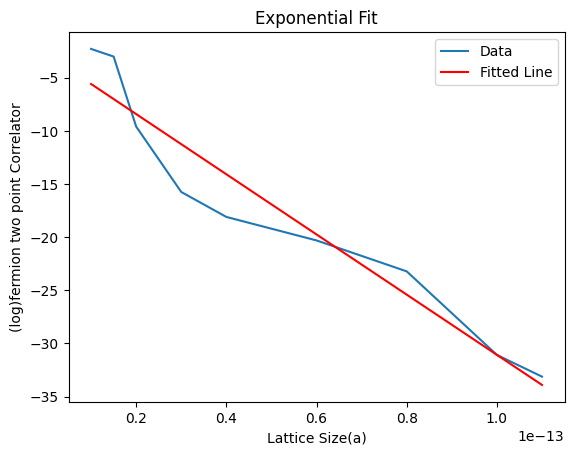

In [ ]:
x_data = np.array(aa)
y_data = np.log(np.abs(np.array(weight_c)))
slope, intercept = np.polyfit(x_data, y_data, 1)
print(f"Slope: {slope}, Intercept: {intercept}")

# Plot data and fitted line
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, slope * x_data + intercept, color='red', label='Fitted Line')
plt.legend()
plt.xlabel('Lattice Size(a)')
plt.ylabel('(log)fermion two point Correlator')
plt.title('Exponential Fit')
plt.show()